# Model Tuning with GridSearchCV and XGBoost
As xgboost remains as the primary model in forecasting housing prices, feature tuning plays a large role in the predictive capability of the model. SkLearn's GridSearchCV is utilized below in order to iteratively fine the optimal set of hyperparameters for the respective model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
import xgboost as xgb

SEED=42

/Users/rlong/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
ci_i5_ap = pd.read_csv('./data/ci_i5_ap.csv')

In [4]:
ci_i5_ap_train, ci_i5_ap_test, ci_i5_ap_train_Y, ci_i5_ap_test_Y = train_test_split(ci_i5_ap, ci_i5_ap['price'], test_size=0, random_state=42)
ci_i5_ap_train.drop('price', axis=1, inplace=True)
ci_i5_ap_train.drop('date', axis=1, inplace=True)
ci_i5_ap_train.drop('id', axis=1, inplace=True)

gbm_ci_i5_ap = xgb.XGBRegressor(seed=SEED)

In [5]:
ci_i5_ap_train.dtypes
cv = cross_val_score(gbm_ci_i5_ap, ci_i5_ap_train, ci_i5_ap_train_Y, cv=10, scoring='r2')

In [6]:
print(cv.mean())

0.8860265866157626


In [7]:
gbm_ci_i5_ap.fit(ci_i5_ap_train, ci_i5_ap_train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

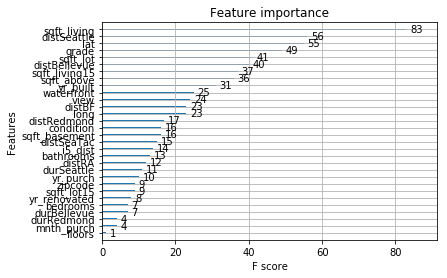

In [8]:
xgb.plot_importance(gbm_ci_i5_ap)

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'objective': ['reg:linear'],
    'seed': [SEED],

    # 1
    'n_estimators': range(2000,3100, 100),
    'gamma': [0, 0.25, 0.5, 0.75, 1.0],
    'max_depth': [1, 3, 5, 7, 9],
    'subsample': [0.5, 0.625, 0.75, 0.875, 1.0],
    'colsample_bytree': [0.5, 0.625, 0.75, 0.875, 1.0],
    
    # 3
    'reg_lambda': [0, 0.25, 0.5, 0.75, 1.0],
    'reg_alpha': [0, 0.25, 0.5, 0.75, 1.0],
    
    # 4
    'learning_rate': [0.01]
}

In [10]:
grid_ci_i5_ap = GridSearchCV(gbm_ci_i5_ap, param_grid_xgb, cv=10)
grid_ci_i5_ap.fit(ci_i5_ap_train, ci_i5_ap_train_Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'objective': ['reg:linear'], 'seed': [42], 'n_estimators': range(2000, 2500, 100), 'learning_rate': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
par = {
    'n_estimators': grid_ci_i5_ap.best_params_['n_estimators']
}
print(grid_ci_i5_ap.best_params_)
print(grid_ci_i5_ap.best_score_)

{'learning_rate': 0.01, 'n_estimators': 2400, 'objective': 'reg:linear', 'seed': 42}
0.8992557576655593
